1. Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
2. Now we will try to check the normality of the numerical variables visually
    2.1 Use seaborn library to construct distribution plots for the numerical variables
    2.2 Use Matplotlib to construct histograms
    2.3 Do the distributions for different numerical variables look like a normal distribution? 
3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features
    4.1 Use the concept of multicollinearity and remove insignificant variables (lab 7)

### Pre-Processing
5. Use the transformation on numerical columns which align it more towards a normal distribution (lab 7) 
6. X-y split
7. One Hot/Label Encoding (categorical)
8. Concat DataFrames

### Linear Regression
9. Train-test split
    8.1 Use a different ratio of train test split (lab 7)
10. Normalize (numerical)
    9.1 Use a different method of scaling the numerical variables (lab 7)
11. Apply linear regression

### Model Validation
12. Description: R2, MSE, RMSE, MAE

### Improving the Linear Regression Model (lab 7)
   5. Use the concept of multicollinearity and remove insignificant variables
       9.1 Use a different method of scaling the numerical variables
       8.1 Use a different ratio of train test split
       2.4 Use the transformation on numerical columns which align it more towards a normal distribution

Bonus: Build a function, from round 2 and round 7, to clean and process the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('final_cleaned_marketing_customer_analysis.csv')

In [3]:
df = df.drop(['Unnamed: 0'], axis=1) 
df.sample(5)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month,total_claim_amount_range,income_group
3136,YS49138,California,8678.508294,No,Premium,High School or Below,1/21/11,Employed,F,62366,...,Personal L2,Offer1,Call Center,51.316527,Four-Door Car,Medsize,A,January,0-250,High
4376,WX37953,Oregon,2780.729047,No,Basic,College,2/22/11,Employed,F,94943,...,Personal L2,Offer2,Web,387.545055,Four-Door Car,Medsize,A,February,250-500,Very High
2581,YO58424,Oregon,2580.849899,Yes,Basic,College,2/9/11,Employed,M,46900,...,Corporate L1,Offer2,Web,316.800000,Four-Door Car,Medsize,A,February,250-500,Middle
2501,XO38850,Arizona,6227.365252,No,Extended,College,2/4/11,Unemployed,M,0,...,Personal L2,Offer3,Agent,676.800000,Four-Door Car,Small,A,February,500-750,Low
3911,CA70404,California,6104.849081,No,Extended,High School or Below,2/4/11,Employed,M,62455,...,Personal L2,Offer2,Branch,338.144854,Two-Door Car,Small,A,February,250-500,High


1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals.

In [4]:
df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type    

In [5]:
numericals = df.select_dtypes(include=[np.number])
numericals.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [6]:
categoricals = df.select_dtypes(include=[np.object])
categoricals.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type',
       'month', 'total_claim_amount_range', 'income_group'],
      dtype='object')

2. Now we will try to check the normality of the numerical variables visually

In [7]:
summary = df.describe().T
summary['iqr'] = summary['75%']-summary['25%']
summary = summary.apply(round)
summary

,count,mean,std,min,25%,50%,75%,max,iqr
customer_lifetime_value,4815.0,8023.0,6926.0,1904.0,4038.0,5838.0,8937.0,83325.0,4898.0
income,4815.0,37635.0,30190.0,0.0,0.0,34516.0,61576.0,99961.0,61576.0
monthly_premium_auto,4815.0,94.0,35.0,61.0,69.0,83.0,110.0,298.0,41.0
months_since_last_claim,4815.0,15.0,10.0,0.0,6.0,14.0,23.0,35.0,17.0
months_since_policy_inception,4815.0,48.0,28.0,0.0,24.0,48.0,72.0,99.0,48.0
number_of_open_complaints,4815.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0
number_of_policies,4815.0,3.0,2.0,1.0,1.0,2.0,4.0,9.0,3.0
total_claim_amount,4815.0,434.0,294.0,0.0,259.0,381.0,548.0,2893.0,289.0


2.1 Use seaborn library to construct distribution plots for the numerical variables

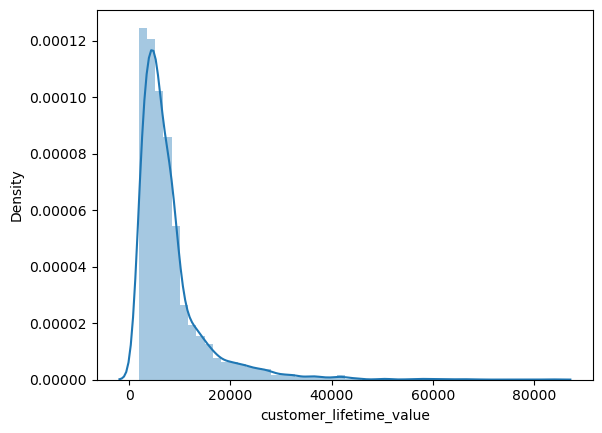

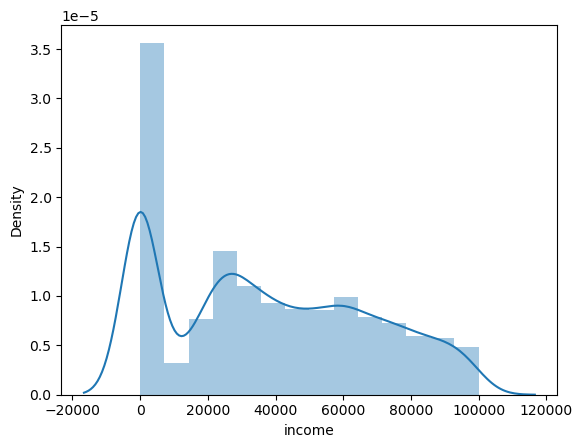

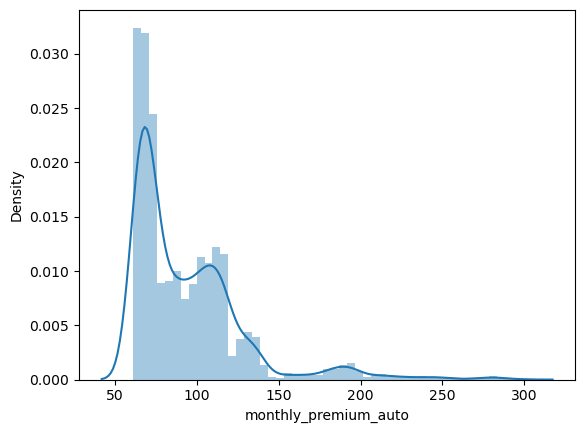

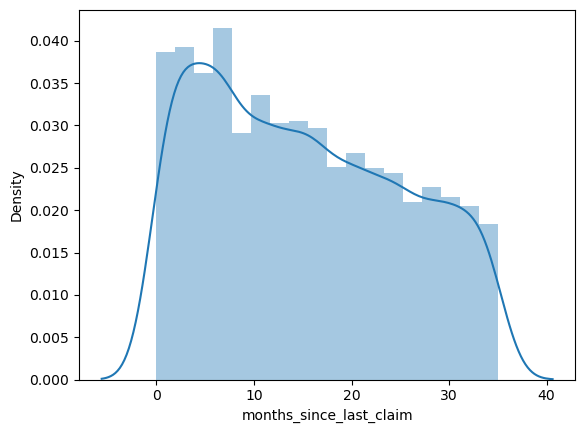

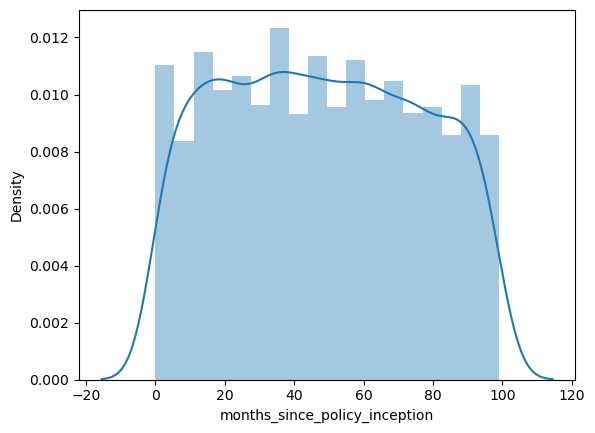

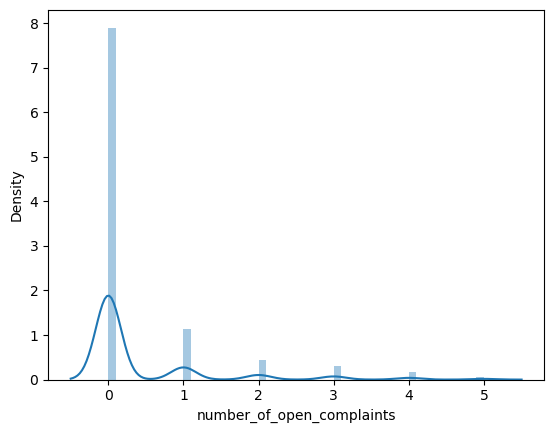

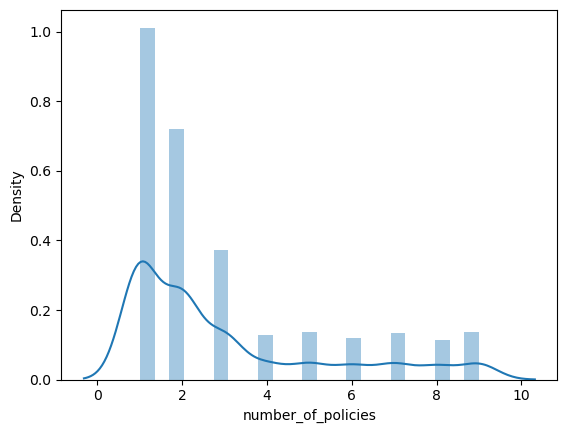

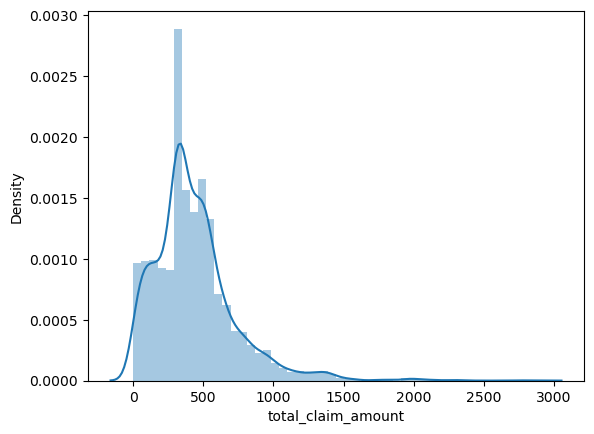

In [8]:
for column in numericals.columns:
    sns.distplot(numericals[column])
    plt.show()

2.2 Use Matplotlib to construct histograms

In [9]:
len(numericals.columns)

8

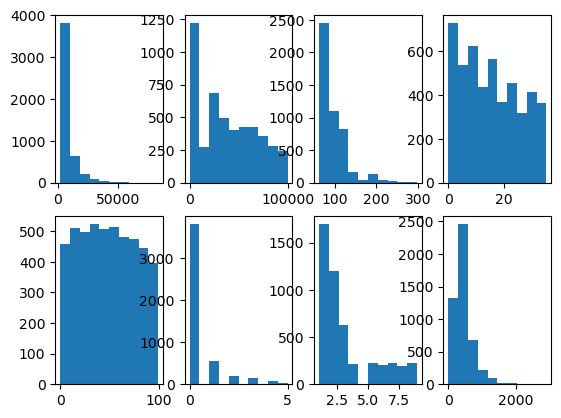

In [10]:
fig, axs = plt.subplots(2, 4)
axs[0, 0].hist(numericals['customer_lifetime_value'])
axs[0, 1].hist(numericals['income'])
axs[0, 2].hist(numericals['monthly_premium_auto'])
axs[0, 3].hist(numericals['months_since_last_claim'])
axs[1, 0].hist(numericals['months_since_policy_inception'])
axs[1, 1].hist(numericals['number_of_open_complaints'])
axs[1, 2].hist(numericals['number_of_policies'])
axs[1, 3].hist(numericals['total_claim_amount'])
plt.show()

2.3 Do the distributions for different numerical variables look like a normal distribution?

The distribution of the 'customer_lifetime_value', 'income', 'monthly_premium_auto', and 'total_claim_amount' variables appear to be somewhat bell-shaped and symmetric, which could indicate a normal distribution.

3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [11]:
correlations_numericals = numericals.corr()
correlations_numericals = round(correlations_numericals,2)
correlations_numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.00,0.02,0.41,0.03,0.03,-0.04,0.02,0.23
income,0.02,1.00,-0.00,-0.01,-0.01,0.00,-0.01,-0.35
monthly_premium_auto,0.41,-0.00,1.00,-0.00,0.03,-0.00,-0.03,0.63
months_since_last_claim,0.03,-0.01,-0.00,1.00,-0.04,-0.00,0.00,-0.01
months_since_policy_inception,0.03,-0.01,0.03,-0.04,1.00,0.00,-0.01,0.01
number_of_open_complaints,-0.04,0.00,-0.00,-0.00,0.00,1.00,0.01,-0.01
number_of_policies,0.02,-0.01,-0.03,0.00,-0.01,0.01,1.00,0.00
total_claim_amount,0.23,-0.35,0.63,-0.01,0.01,-0.01,0.00,1.00


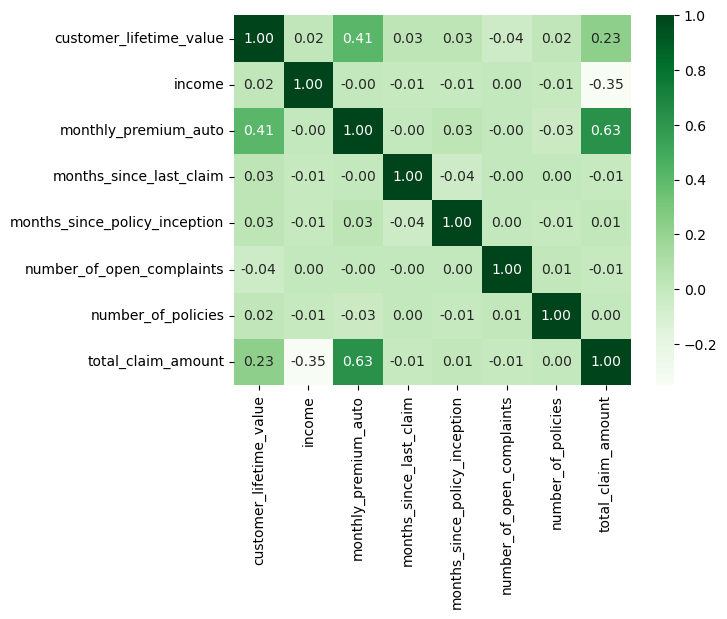

In [12]:
sns.heatmap(correlations_numericals, cmap="Greens", annot=True, fmt='.2f')
plt.show()

4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

There's no high correlation between two variables.

4.1 Use the concept of multicollinearity and remove insignificant variables

In [13]:
numericals = numericals.drop(['number_of_policies'], axis=1)

In [14]:
numericals = numericals.drop(['number_of_open_complaints'], axis=1)

In [15]:
numericals = numericals.drop(['months_since_policy_inception'], axis=1)

In [16]:
numericals = numericals.drop(['months_since_last_claim'], axis=1)

In [17]:
correlations_numericals = numericals.corr()
correlations_numericals = round(correlations_numericals,2)
correlations_numericals

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer_lifetime_value,1.00,0.02,0.41,0.23
income,0.02,1.00,-0.00,-0.35
monthly_premium_auto,0.41,-0.00,1.00,0.63
total_claim_amount,0.23,-0.35,0.63,1.00


5. Use the transformation on numerical columns which align it more towards a normal distribution (lab 7)

Based on the histograms, a logarithmic transformation may be a good starting point to reduce skewness in 'customer_lifetime_value', while a square-root or logarithmic transformation may be appropriate for 'monthly_premium_auto'. I don't want to normalize 'income' since there are many values of 0 (1225) and converting all of them to the mean or any other value for that matter would change the relation of one of the most important dependent variables 'income' with the target 'total_claim_amount' completely.

In [18]:
num_zeros = (numericals['income'] == 0).sum()
num_zeros


1225

In [19]:
numericals.isna().sum()

customer_lifetime_value    0
income                     0
monthly_premium_auto       0
total_claim_amount         0
dtype: int64

In [20]:
numericals2 = numericals.copy()

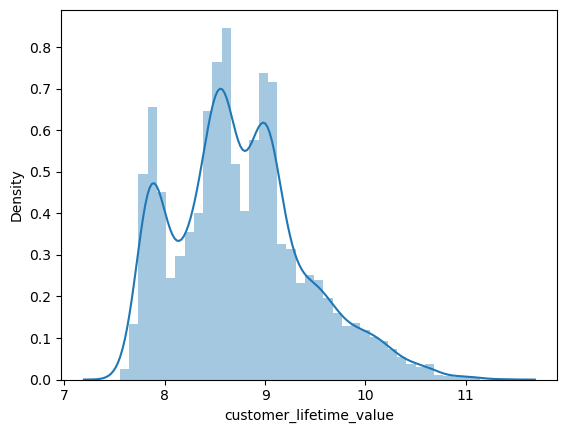

In [21]:
numericals2['customer_lifetime_value'] = np.log(numericals2['customer_lifetime_value'])
sns.distplot(numericals2['customer_lifetime_value'])
plt.show()

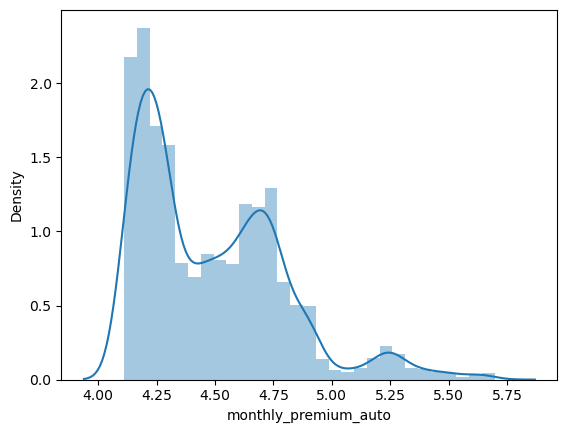

In [22]:
numericals2['monthly_premium_auto'] = np.log(numericals2['monthly_premium_auto'])
sns.distplot(numericals2['monthly_premium_auto'])
plt.show()

6. X-y split

In [23]:
y = numericals2['total_claim_amount']
X = numericals2.drop(['total_claim_amount'], axis=1)
X.sample(20)

,customer_lifetime_value,income,monthly_premium_auto
1395,8.959375,87128,4.574711
4020,8.379943,86001,4.691348
328,8.439621,79487,4.736198
899,8.707322,20396,4.330733
4176,8.780080,22081,4.430817
1184,8.078135,0,4.510860
2417,10.323596,64321,5.533389
2633,7.851211,11167,4.290459
309,8.839235,37308,4.454347
2190,8.492411,0,4.189655


10. Normalize (numerical)

In [24]:
scaler = MinMaxScaler()
scaler.fit(X)
normalized_X = scaler.transform(X)
X_norm = pd.DataFrame(normalized_X, columns=X.columns)

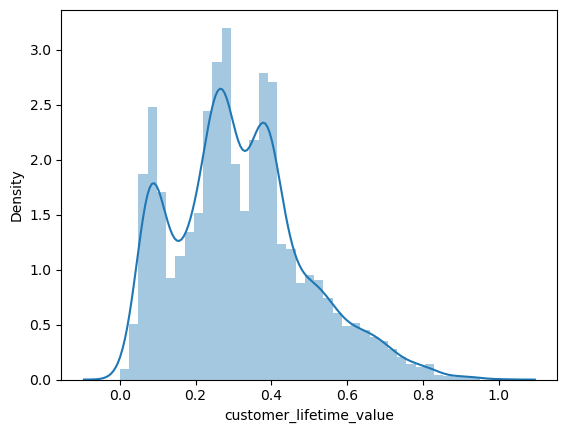

In [25]:
sns.distplot(X_norm['customer_lifetime_value']) # for example for customer_lifetime_value
plt.show()

9.1 Use a different method of scaling the numerical variables

In [26]:
transformer = StandardScaler().fit(X)
standardized_X = transformer.transform(X)
X_stand = pd.DataFrame(standardized_X, columns=X.columns)
X_stand.sample(3)

,customer_lifetime_value,income,monthly_premium_auto
2157,-0.498536,-1.246753,-1.101684
1254,-0.726110,-1.246753,0.536616
246,-0.879440,1.199791,0.006395


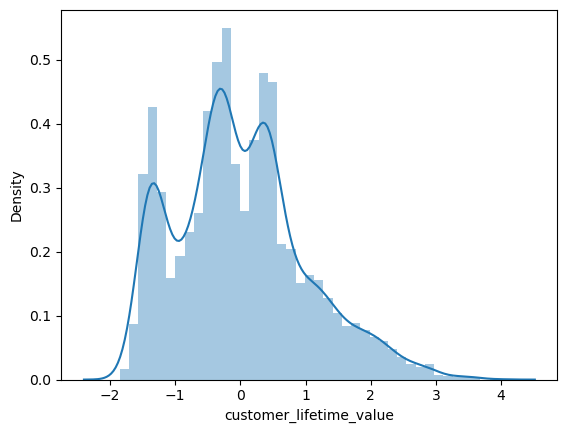

In [27]:
sns.distplot(X_stand['customer_lifetime_value']) # for example for customer_lifetime_value
plt.show()

7. One Hot/Label Encoding (categorical)

In [28]:
X_num = df.select_dtypes(include = np.number)
X_cat = df.select_dtypes(include = np.object)
X_cat.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type',
       'month', 'total_claim_amount_range', 'income_group'],
      dtype='object')

Checking all columns for their categories, and dropping the column if there are too many or only one category. Also dropping the columns that I had added for visualization. I also drop the columns that don't influence the target much, to my understanding. Or a represented (partly) by another variable, in this case "income", which has a good correlation with the target.

In [29]:
X_cat.renew_offer_type.unique()

array(['Offer3', 'Offer2', 'Offer1', 'Offer4'], dtype=object)

In [30]:
X_cat = X_cat.drop(['customer'], axis=1)

In [31]:
X_cat = X_cat.drop(['effective_to_date'], axis=1)

In [32]:
X_cat = X_cat.drop(['vehicle_type'], axis=1)

In [33]:
X_cat = X_cat.drop(['total_claim_amount_range'], axis=1)

In [34]:
X_cat = X_cat.drop(['income_group'], axis=1)

In [35]:
X_cat = X_cat.drop(['month'], axis=1)

In [36]:
X_cat = X_cat.drop(['state'], axis=1) 

In [37]:
X_cat = X_cat.drop(['location_code'], axis=1) 

In [38]:
X_cat = X_cat.drop(['sales_channel'], axis=1)

In [39]:
X_cat = X_cat.drop(['education'], axis=1) # likely related to income

In [40]:
X_cat = X_cat.drop(['marital_status'], axis=1) # likely related to income

In [41]:
X_cat = X_cat.drop(['policy'], axis=1) # the same as policy_type

In [42]:
X_cat.columns

Index(['response', 'coverage', 'employment_status', 'gender', 'policy_type',
       'renew_offer_type', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [43]:
# for more than one categorical column we use the get dummies method to one hot encode
X_cat_dumm = pd.get_dummies(X_cat, drop_first=True)
X_cat_dumm

,response_Yes,coverage_Extended,coverage_Premium,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_M,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4810,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
4811,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0
4812,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0
4813,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


8. Concat DataFrames

In [44]:
X = pd.concat([X_cat_dumm, X_stand], axis=1)
X.sample(5)

,response_Yes,coverage_Extended,coverage_Premium,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_M,policy_type_Personal Auto,policy_type_Special Auto,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,customer_lifetime_value,income,monthly_premium_auto
2889,0,1,0,0,0,0,1,1,1,0,...,0,0,1,0,0,0,0,-0.417486,-1.246753,1.366291
619,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,1,1,0,-0.961195,-1.246753,0.112720
251,0,1,0,0,0,0,1,1,1,0,...,0,0,1,0,0,1,0,-0.502131,-1.246753,1.070035
2616,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1.082983,-1.246753,2.265265
1561,0,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,1.102321,-0.227661,0.714838


In [45]:
ordered_columns = sorted(X.columns, reverse=False)
ordered_columns
X = X[ordered_columns]
X.columns

Index(['coverage_Extended', 'coverage_Premium', 'customer_lifetime_value',
       'employment_status_Employed', 'employment_status_Medical Leave',
       'employment_status_Retired', 'employment_status_Unemployed', 'gender_M',
       'income', 'monthly_premium_auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'renew_offer_type_Offer2',
       'renew_offer_type_Offer3', 'renew_offer_type_Offer4', 'response_Yes',
       'vehicle_class_Luxury Car', 'vehicle_class_Luxury SUV',
       'vehicle_class_SUV', 'vehicle_class_Sports Car',
       'vehicle_class_Two-Door Car', 'vehicle_size_Medsize',
       'vehicle_size_Small'],
      dtype='object')

## Linear Regression

9. Train-test split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=78)

In [47]:
len(X)*0.3

1444.5

In [48]:
len(X_train)

3370

In [49]:
len(X_test)

1445

9.1 Use a different ratio of train test split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [51]:
len(X)*0.2

963.0

In [52]:
len(X_test)

963

11. Apply linear regression

In [53]:
model = LinearRegression()
model.fit(X_train,y_train) # training the model, fitting the data to the model

LinearRegression()

In [54]:
predictions  = model.predict(X_test)
predictions

array([ 299.60401972,  270.56134596,  372.74365588,  505.48687108,
        472.13944302,  485.90706483,  268.72243014,  327.27984519,
        272.98356565,  318.74742703,  377.7625332 ,  677.2605199 ,
        363.80675051,  321.62053484,  271.34893843,  179.63467464,
        153.24872039,  242.29375393,  412.01286844,  227.22272327,
        271.13497182,  363.96032156,  400.10849172,  409.60640749,
        399.49326654,  386.9742545 ,  201.68995277,  278.74803976,
        533.29063168, 1200.02461822,  535.30867295,  423.27365096,
        429.30707537,  266.21539007,  325.00345228,  419.61083528,
        580.44918391,  284.01652115,  323.81165642,  485.18764549,
        429.23609313,  520.74485364,  572.6787321 ,  276.4140745 ,
        242.09588078,  321.78254945,  332.13249379,  503.94223803,
        478.2270376 ,  495.01716338,  295.81413128,  535.16385924,
        420.98452995,  877.53159954,  192.86711018,  313.62213284,
        463.90811886,  424.64132848,  278.25345451,  777.97619

In [55]:
y_test 

4010     85.683520
4740    118.454974
3389    504.000000
3160    619.200000
3445    987.122788
           ...    
3135    128.969729
3048    279.450351
3894    336.000000
1101    316.800000
1461    331.200000
Name: total_claim_amount, Length: 963, dtype: float64

## Model Validation

12. Description: R2, RMSE, MSE, MAE

In [56]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)

print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)

r2 =  0.5051233818919161
RMSE =  205.82403848788834
MSE =  42363.53481946375
MAE =  144.11094766906322


In [57]:
df['total_claim_amount'].describe()

count    4815.000000
mean      433.968686
std       294.084064
min         0.099007
25%       259.476251
50%       381.118731
75%       547.988754
max      2893.239678
Name: total_claim_amount, dtype: float64